### 파이썬 머신러닝
## 텍스트 데이터
---
# IMDb 리뷰 다루기

- 데이터 전체 :  말뭉치 (corpus)
- 샘플 하나 : 문서 (document)
- 자연어 처리 : NLP(Natural language processing)
- 한국어는 하나의 **어절**이 여러 개의 의미 단위로 구성되는 경우가 있으므로 **형태소 분석**을 해야 한다

- IMDb 영화 리뷰 데이터셋 : https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/data/aclImdb_v1.tar.gz
- data/aclImdb 폴더에 압축을 푼다
> ```
./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/train/unsup
```

- ./data/aclImdb/train/unsup 폴더를 지운다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_files

imdb_train = load_files('data/aclImdb/train/')
imdb_test = load_files('data/aclImdb/test/')

np.save('imdb.npy',[imdb_train, imdb_test])

In [13]:
# 위에서 정상적으로 "imdb.npy" 가 저장이 되었다면 아래를 실행한다
imdb_train, imdb_test = np.load('imdb.npy')

- imdb_train 과 imdb_test 내용 확인

In [14]:
type(imdb_train)

sklearn.utils.Bunch

In [15]:
dir(imdb_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [16]:
imdb_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [17]:
imdb_train.target

array([1, 0, 1, ..., 0, 0, 0])

In [18]:
imdb_train.target_names

['neg', 'pos']

In [19]:
# DESCR, data, filenames, target, target_names
display(type(imdb_train.data), len(imdb_train.data))     # list
display(imdb_train.filenames)
display(type(imdb_train.target), len(imdb_train.target)) # array
display(imdb_train.target_names)                         # list

list

25000

array(['data/aclImdb/train/pos\\11485_10.txt',
       'data/aclImdb/train/neg\\6802_1.txt',
       'data/aclImdb/train/pos\\7641_10.txt', ...,
       'data/aclImdb/train/neg\\7611_4.txt',
       'data/aclImdb/train/neg\\8470_2.txt',
       'data/aclImdb/train/neg\\1245_2.txt'], dtype='<U35')

numpy.ndarray

25000

['neg', 'pos']

In [20]:
imdb_train.target[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [22]:
imdb_train.data[0] # 바이너리 문자열로 되어 있음

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [23]:
imdb_train.data[0].decode() # 일반 스트링으로 바꿈

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

- 위의 문장은 타입이 bytes 이다. 그리고 문장 중간에 ```'<br />'``` 이 포함되어 있다.

In [24]:
imdb_train.target[0]

1

In [25]:
s = imdb_train.data[0]
s.decode()

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [26]:
s = imdb_train.data[0]
s.decode().replace('<br />', '') # s.replace(b'<br />', b'') 로 변환하면 출력 타입이 bytes 이다

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

### 데이터 정제
- text_train : 리뷰 내용
- y_train : 긍정/부정

In [29]:
text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
len(text_train)

25000

In [30]:
text_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

In [31]:
y_train = imdb_train.target
display(y_train.shape, y_train)

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [32]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

In [33]:
sum(y_train)

12500

- load_files() 함수는 폴더 이름을 알파벳 순서로 읽기 때문에, 'neg' 폴더는 0, 'pos' 폴더는 1 로 타겟값이 지정된다.
- imdb_train.target_names 값의 순서이기도 하다.

### 테스트 데이터
- 테스트 파일을 분석하자

In [34]:
display(type(imdb_test.data), len(imdb_test.data))     # list
display(imdb_test.filenames)
display(type(imdb_test.target), len(imdb_test.target)) # array
display(imdb_test.target_names)                         # list

list

25000

array(['data/aclImdb/test/pos\\11485_9.txt',
       'data/aclImdb/test/neg\\6802_1.txt',
       'data/aclImdb/test/pos\\7641_8.txt', ...,
       'data/aclImdb/test/neg\\7611_2.txt',
       'data/aclImdb/test/neg\\8470_1.txt',
       'data/aclImdb/test/neg\\1245_2.txt'], dtype='<U34')

numpy.ndarray

25000

['neg', 'pos']

In [35]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
display(len(text_test))

y_test = imdb_test.target
display(y_test.shape, y_test)

25000

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
np.bincount(y_test)

array([12500, 12500], dtype=int64)

### 정리
- text_train => list, 25000
- y_train => array, 25000
- text_test => list, 25000
- y_test => array, 25000

In [37]:
type(text_train), len(text_train)

(list, 25000)

In [38]:
type(y_train), y_train.shape

(numpy.ndarray, (25000,))

In [39]:
type(text_test), len(text_test)

(list, 25000)

In [40]:
type(y_test), y_test.shape

(numpy.ndarray, (25000,))

### BOW (Bag Of Words) : 단어집
전체 텍스트 데이터에서 단어집을 만드는 방법
- CountVectorizer
- TfidfVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

ss = ['I am Tom. Tom is me!', 'He is Tom. He is a man.']
vect = CountVectorizer()
vect.fit(ss)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [47]:
vect.vocabulary_ # 한 글자 단어와 구두점은 제외한다 (소문자로 변환)

{'am': 0, 'he': 1, 'is': 2, 'man': 3, 'me': 4, 'tom': 5}

In [48]:
voca = vect.vocabulary_
sorted([(v,k) for k,v in voca.items()])

[(0, 'am'), (1, 'he'), (2, 'is'), (3, 'man'), (4, 'me'), (5, 'tom')]

In [49]:
vect.transform(ss)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [50]:
vect.transform(ss).toarray()

array([[1, 0, 1, 0, 1, 2],
       [0, 2, 2, 1, 0, 1]], dtype=int64)

In [56]:
vect.transform(['tom am me']).toarray()

array([[1, 0, 0, 0, 1, 1]], dtype=int64)

In [29]:
vect.get_feature_names()

['am', 'he', 'is', 'man', 'me', 'tom']

In [31]:
print(*list(enumerate(vect.get_feature_names())), sep=', ')

(0, 'am'), (1, 'he'), (2, 'is'), (3, 'man'), (4, 'me'), (5, 'tom')


- IMDB 데이터의 BOW 생성

In [57]:
vect = CountVectorizer()
vect.fit(text_train) # 단어집이 만들어진다
X_train = vect.transform(text_train) # sparse matrix

In [33]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 75911)

In [81]:
X_train

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>

In [35]:
X_train.shape

(25000, 75911)

In [75]:
vect.vocabulary_

{'zero': 75669,
 'day': 16986,
 'leads': 38653,
 'you': 75381,
 'to': 68091,
 'think': 67468,
 'even': 23059,
 're': 54503,
 'why': 73998,
 'two': 69757,
 'boys': 8922,
 'young': 75392,
 'men': 42764,
 'would': 74762,
 'do': 19634,
 'what': 73731,
 'they': 67409,
 'did': 18588,
 'commit': 13888,
 'mutual': 45268,
 'suicide': 65104,
 'via': 72211,
 'slaughtering': 61588,
 'their': 67280,
 'classmates': 12958,
 'it': 35211,
 'captures': 10809,
 'must': 45209,
 'be': 6512,
 'beyond': 7341,
 'bizarre': 7716,
 'mode': 43993,
 'of': 47352,
 'being': 6852,
 'for': 25839,
 'humans': 32540,
 'who': 73935,
 'have': 30570,
 'decided': 17219,
 'withdraw': 74379,
 'from': 26582,
 'common': 13907,
 'civility': 12845,
 'in': 33505,
 'order': 47900,
 'define': 17460,
 'own': 48610,
 'world': 74699,
 'coupled': 15414,
 'destruction': 18214,
 'is': 35099,
 'not': 46714,
 'perfect': 49947,
 'movie': 44779,
 'but': 10096,
 'given': 28034,
 'money': 44193,
 'time': 67883,
 'the': 67244,
 'filmmaker': 24942

In [61]:
i2w = {v:k for k,v in vect.vocabulary_.items()}
i2w = {i:i2w[i] for i in sorted(i2w)}
i2w

{0: '00',
 1: '000',
 2: '0000000000001',
 3: '00001',
 4: '00015',
 5: '000s',
 6: '001',
 7: '003830',
 8: '006',
 9: '007',
 10: '0079',
 11: '0080',
 12: '0083',
 13: '0093638',
 14: '00am',
 15: '00pm',
 16: '00s',
 17: '01',
 18: '01pm',
 19: '02',
 20: '020410',
 21: '029',
 22: '02i',
 23: '03',
 24: '04',
 25: '041',
 26: '05',
 27: '050',
 28: '06',
 29: '06th',
 30: '07',
 31: '08',
 32: '087',
 33: '089',
 34: '08th',
 35: '09',
 36: '0f',
 37: '0ne',
 38: '0r',
 39: '0s',
 40: '10',
 41: '100',
 42: '1000',
 43: '1000000',
 44: '10000000000000',
 45: '1000lb',
 46: '1000s',
 47: '1001',
 48: '100b',
 49: '100k',
 50: '100m',
 51: '100min',
 52: '100mph',
 53: '100s',
 54: '100th',
 55: '100x',
 56: '100yards',
 57: '101',
 58: '101st',
 59: '102',
 60: '102nd',
 61: '103',
 62: '104',
 63: '1040',
 64: '1040a',
 65: '1040s',
 66: '105',
 67: '1050',
 68: '105lbs',
 69: '106',
 70: '106min',
 71: '107',
 72: '108',
 73: '109',
 74: '10am',
 75: '10another',
 76: '10as',
 77

In [67]:
i2w = {i:w for w,i in sorted(vect.vocabulary_.items(), key=lambda t: t[1])}
i2w

{0: '00',
 1: '000',
 2: '0000000000001',
 3: '00001',
 4: '00015',
 5: '000s',
 6: '001',
 7: '003830',
 8: '006',
 9: '007',
 10: '0079',
 11: '0080',
 12: '0083',
 13: '0093638',
 14: '00am',
 15: '00pm',
 16: '00s',
 17: '01',
 18: '01pm',
 19: '02',
 20: '020410',
 21: '029',
 22: '02i',
 23: '03',
 24: '04',
 25: '041',
 26: '05',
 27: '050',
 28: '06',
 29: '06th',
 30: '07',
 31: '08',
 32: '087',
 33: '089',
 34: '08th',
 35: '09',
 36: '0f',
 37: '0ne',
 38: '0r',
 39: '0s',
 40: '10',
 41: '100',
 42: '1000',
 43: '1000000',
 44: '10000000000000',
 45: '1000lb',
 46: '1000s',
 47: '1001',
 48: '100b',
 49: '100k',
 50: '100m',
 51: '100min',
 52: '100mph',
 53: '100s',
 54: '100th',
 55: '100x',
 56: '100yards',
 57: '101',
 58: '101st',
 59: '102',
 60: '102nd',
 61: '103',
 62: '104',
 63: '1040',
 64: '1040a',
 65: '1040s',
 66: '105',
 67: '1050',
 68: '105lbs',
 69: '106',
 70: '106min',
 71: '107',
 72: '108',
 73: '109',
 74: '10am',
 75: '10another',
 76: '10as',
 77

In [36]:
i=0
for v in vect.vocabulary_:
    print(v, '=>', vect.vocabulary_[v])
    i+=1
    if i==10: break

zero => 75669
day => 16986
leads => 38653
you => 75381
to => 68091
think => 67468
even => 23059
re => 54503
why => 73998
two => 69757


In [69]:
feature_names = vect.get_feature_names()
feature_names

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '02i',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10another',
 '10as',
 '10cheesiness',
 '10could',
 '10eliason',
 '10entertainment',
 '10fans',
 '10fifth',
 '10guinea',
 '10hulkamaniacs',
 '10i',
 '10james',
 '10lame',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10molly',
 '10my',
 '10not',
 '10objectionable',
 '10overall',
 '10p',
 '10peace',
 '10pm',
 '10quality'

In [71]:
feature_names[-10:]

['était',
 'état',
 'étc',
 'évery',
 'êxtase',
 'ís',
 'ísnt',
 'østbye',
 'über',
 'üvegtigris']

In [37]:
feature_names = vect.get_feature_names()
display(type(feature_names), len(feature_names))
display(feature_names[:5], feature_names[20010:20015], feature_names[::10000],
        feature_names[-5:])

list

75911

['00', '000', '0000000000001', '00001', '00015']

['doppelgangers', 'doppelgänger', 'dopplebangers', 'doppleganger', 'doppler']

['00',
 'burress',
 'dop',
 'hallucinogenics',
 'looping',
 'periphery',
 'shaffer',
 'una']

['ís', 'ísnt', 'østbye', 'über', 'üvegtigris']

In [77]:
feature_names[7000]

'benches'

In [80]:
feature_names[1170]

'_x'

In [82]:
X_train.shape

(25000, 75911)

In [84]:
X_train[0].toarray() # 첫번째 리뷰 (Zero day ... )

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
vect.vocabulary_['zero']

75669

In [86]:
X_train[0,75669]

1

In [87]:
# feature_names = vect.get_feature_names()
feature_names[75669]

'zero'

In [94]:
doc = X_train[0].toarray().ravel() # 첫번째 리뷰를 숫자로 변환하 것
doc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
idx = np.where(doc>0)[0] # 첫번째 리뷰에 들어간 단어의 인덱스번호
idx

array([ 1723,  1741,  2880,  3375,  3859,  4269,  6512,  6852,  7288,
        7341,  7716,  8922, 10096, 10809, 12845, 12958, 13888, 13907,
       15414, 16986, 17219, 17460, 18214, 18588, 19634, 21607, 23059,
       23541, 24147, 24904, 24942, 25360, 25839, 26582, 27726, 28034,
       29807, 30570, 31970, 31972, 32540, 33505, 35099, 35211, 38653,
       39336, 42764, 43993, 44193, 44676, 44779, 45110, 45209, 45268,
       46714, 47352, 47900, 48156, 48610, 49947, 52605, 54367, 54503,
       55513, 59385, 61440, 61588, 65104, 67035, 67049, 67198, 67222,
       67244, 67280, 67409, 67468, 67883, 68091, 69757, 70279, 72211,
       73731, 73935, 73998, 74378, 74379, 74699, 74762, 75381, 75392,
       75669], dtype=int64)

In [99]:
np.array(feature_names)[idx] # 첫번째 리뷰에 들어간 단어들

array(['actions', 'actors', 'almost', 'and', 'anything', 'are', 'be',
       'being', 'better', 'beyond', 'bizarre', 'boys', 'but', 'captures',
       'civility', 'classmates', 'commit', 'common', 'coupled', 'day',
       'decided', 'define', 'destruction', 'did', 'do', 'elephant',
       'even', 'explaining', 'far', 'film', 'filmmaker', 'flawed', 'for',
       'from', 'gets', 'given', 'had', 'have', 'honest', 'honesty',
       'humans', 'in', 'is', 'it', 'leads', 'likely', 'men', 'mode',
       'money', 'motives', 'movie', 'murderers', 'must', 'mutual', 'not',
       'of', 'order', 'our', 'own', 'perfect', 'product', 'rationalistic',
       're', 'remarkable', 'see', 'skin', 'slaughtering', 'suicide',
       'terms', 'terrible', 'than', 'that', 'the', 'their', 'they',
       'think', 'time', 'to', 'two', 'under', 'via', 'what', 'who', 'why',
       'with', 'withdraw', 'world', 'would', 'you', 'young', 'zero'],
      dtype='<U74')

In [102]:
doc[idx]

array([1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 4, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1,
       2, 2, 1], dtype=int64)

In [39]:
for i in range(10):
    # a = X_train[i].toarray()
    a = X_train[i]
    print('%4d, %4d, %s' % ((a > 0).sum(), a.sum(), a.shape))

  91,  127, (1, 75911)
 120,  192, (1, 75911)
  62,   79, (1, 75911)
  95,  139, (1, 75911)
 166,  295, (1, 75911)
  47,   50, (1, 75911)
  78,  104, (1, 75911)
 151,  262, (1, 75911)
 220,  435, (1, 75911)
  43,   51, (1, 75911)


In [40]:
doc_0 = X_train[0]
doc_0[doc_0>0]

#X_train[0][X_train[0]>0]

matrix([[1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
         4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 4, 3, 1, 2, 3, 1, 1,
         1, 1, 1, 1, 2, 2, 1]], dtype=int64)

In [41]:
doc_0.shape

(1, 75911)

In [85]:
for i in range(75911):
    n = doc_0[0,i]
    if n>0: print(i,feature_names[i],n)

1723 actions 1
1741 actors 1
2880 almost 1
3375 and 2
3859 anything 1
4269 are 1
6512 be 1
6852 being 2
7288 better 2
7341 beyond 1
7716 bizarre 1
8922 boys 1
10096 but 2
10809 captures 1
12845 civility 1
12958 classmates 1
13888 commit 1
13907 common 1
15414 coupled 1
16986 day 1
17219 decided 1
17460 define 1
18214 destruction 1
18588 did 1
19634 do 1
21607 elephant 1
23059 even 1
23541 explaining 1
24147 far 2
24904 film 2
24942 filmmaker 1
25360 flawed 1
25839 for 1
26582 from 1
27726 gets 1
28034 given 1
29807 had 1
30570 have 1
31970 honest 1
31972 honesty 1
32540 humans 1
33505 in 3
35099 is 4
35211 it 5
38653 leads 1
39336 likely 1
42764 men 1
43993 mode 1
44193 money 1
44676 motives 1
44779 movie 1
45110 murderers 1
45209 must 1
45268 mutual 2
46714 not 1
47352 of 4
47900 order 1
48156 our 1
48610 own 1
49947 perfect 1
52605 product 1
54367 rationalistic 1
54503 re 1
55513 remarkable 1
59385 see 1
61440 skin 1
61588 slaughtering 1
65104 suicide 2
67035 terms 2
67049 terrible 1

### 단어집 만들기 총정리

In [ ]:
### 훈련
vect = CountVectorizer()
vect.fit(text_train)

In [109]:
### 단어사전
voca = vect.vocabulary_ # dict
feature_names = vect.get_feature_names() # list

In [ ]:
### 변환
X_train = vect.transform(text_train) # (25000, 75911)

In [103]:
# 두번째 리뷰가 어떻게 변환되었는지 확인해 보자!
text_train[1]

'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulence"-movie

In [107]:
doc = X_train[1].toarray().ravel()
doc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
for i,v in enumerate(doc):
    if v>0: print(i,v,feature_names[i])

949 1 747
2463 1 airline
2464 1 airliner
2471 1 airplane
2767 2 all
2933 1 also
3284 1 an
3375 2 and
4269 4 are
4910 1 at
5669 3 bad
6512 2 be
6638 1 because
6723 1 been
6762 1 before
7288 3 better
8320 1 boeing
10096 2 but
10181 1 by
10580 4 can
12413 1 choice
13089 1 clichés
13675 1 coloring
13685 1 colors
15363 1 count
16123 1 cry
17235 1 decision
18072 1 describe
18599 1 didn
19634 1 do
19895 1 done
20115 1 doubt
21050 1 early
23059 2 even
23105 1 every
23363 1 executive
23537 1 explain
23871 1 fact
24775 1 fictional
25130 1 first
25839 1 for
27716 1 get
28490 1 good
29165 1 grip
29674 2 guys
30449 1 has
30570 1 have
31132 3 here
32153 1 horrible
32347 2 how
33167 1 imagine
33505 5 in
34399 1 instead
35099 3 is
35211 3 it
36334 2 just
39560 1 list
39648 1 livery
40073 1 lost
40076 1 lot
41016 1 make
41189 1 manage
41424 3 many
42834 1 mention
43840 2 mistakes
44150 1 moments
44779 4 movie
44805 1 movies
44890 2 much
45881 1 negative
46714 1 not
47352 5 of
47611 1 on
47628 2 one
476

### 연습문제
- 'korea' 단어의 인덱스번호를 알아내자
> voca = vect.vocabulary_
- 'korea' 가 들어간 문서들을 뽑아내 보자 (해당 행번호를 알아낸다)
> X_train
- 그 문서 중에 긍정과 부정의 비율이 어떻게 되는지 확인해 보자
> y_train

In [163]:
word = 'korea'
id = voca[word]

In [164]:
rows = np.where(X_train[:,id].toarray()>0)[0]
rows

array([   52,   217,   565,   669,   991,  1250,  2514,  2608,  3001,
        3102,  3690,  3923,  4059,  4795,  5060,  5389,  5841,  6456,
        7150,  7211,  7324,  7563,  7670,  8120,  8186,  8978,  9160,
        9396, 11087, 12760, 13154, 15486, 16775, 16990, 17075, 17499,
       19444, 19905, 21025, 22301, 24376], dtype=int64)

In [165]:
y_train[rows]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [166]:
np.bincount(y_train[rows])

array([16, 25], dtype=int64)

In [167]:
y_train[rows].mean()

0.6097560975609756

In [169]:
text_train[217]

"This is a story about Shin-ae, who moves to Milyang from Seoul with her young son Jun to start over after the accidental death of her husband. Her husband was born here, and she is opening up a piano school, but also has ambitions to own some land with the insurance money she received from the death. If that is what the film was about, it probably would have been like a Hollywood film, with her falling for some local guy and being happy with her son in their new home. But, this is not Hollywood. Her son gets kidnapped and murdered, ostensibly because it is known she has cash from the settlement. The grief process, attempts at moving on, attempts to clear her conscience of guilt, are all done admirably, and the lead actress is superb. The only caveat, and it has to be stated, is that this is a depressing film. You have to know that going in. You want Shin-ae to go through her grief and find some measure of happiness. Again, this is not Hollywood, it is Korea and in Korean cinema, espec

### 분류 모델 적용
- LogisticRegression 과 교차검증 적용 (학습데이터만 사용함)
- LogisticRegression 의 설정값인 C 를 바꿔가면서 적용해야 한다.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(LogisticRegression(C=1), X_train, y_train) # default cv=3
scores

array([0.87724982, 0.87365011, 0.87650024])

In [44]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(X_train, y_train) 

In [45]:
model = LogisticRegression(C=1)
model.fit(train_data, train_target)
model.score(test_data, test_target)

0.87952

- 테스트세트를 적용하여 점수 확인
- C 값으로 0.1 을 적용한다
> **주의** : text_train 으로 단어집을 만들었으므로 text_test 에는 단어집에 없는 단어가 있을 수 있다

In [46]:
X_test = vect.transform(text_test)

In [47]:
X_test.shape

(25000, 75911)

In [48]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
score = model.score(X_test, y_test)
score

0.87884

In [50]:
model.score(X_train, y_train)

0.97504

- Naive Bayes 적용

In [51]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BernoulliNB(), X_train, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

In [52]:
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.82604

- SVM 을 적용하면 시간이 아주 오래 걸린다. 결과만 참고하자.

In [33]:
'''from sklearn.svm import SVC

scores = cross_val_score(SVC(), X_train, y_train)
scores'''

array([0.71358291, 0.70230382, 0.71915506])

### 속성(단어) 줄이기
- CountVectorizer 의 min_df=5 로 설정 (5개 이하로 문서에 나타나는 단어는 제외)
- 특성의 갯수가 줄어서 처리 속도가 빨라짐

In [107]:
vect_5 = CountVectorizer(min_df=5)
vect_5.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [108]:
len(vect.vocabulary_), len(vect_5.vocabulary_) # 75911 => 27264

(75911, 27264)

In [ ]:
vv = vect_5.get_feature_names()

In [119]:
vv[-10:]

['zoot',
 'zorro',
 'zu',
 'zucco',
 'zucker',
 'zuckerman',
 'zulu',
 'zuniga',
 'zwick',
 'émigré']

In [109]:
X_train_5 = vect_5.transform(text_train)

In [110]:
scores = cross_val_score(LogisticRegression(), X_train_5, y_train)
scores

array([0.87520998, 0.87149028, 0.87554009])

In [111]:
scores = cross_val_score(BernoulliNB(), X_train_5, y_train)
scores

array([0.84701224, 0.84521238, 0.85345655])

### 불용어 적용
- CountVectorizer(stop_words='english', max_df=...)
- stop_words : 불용어 목록을 지정함
- max_df : 너무 자주 나타나는 단어를 제외함 (0~1 사이의 비율 지정)

In [52]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------

In [174]:
vect2 = CountVectorizer(min_df=5, max_df=0.2, stop_words='english')
vect2.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [175]:
len(vect2.vocabulary_)

26938

### Tf-idf 적용
- 단어빈도-역문서빈도(tf-idf) 적용
- 한 문서에서 특정 단어가 다른 문서에서 보다 많이 나타날 때 가중치를 높게 주는 방식이다
- CountVectorizer 호출 후 TfidfTransformer 적용, 또는 바로 TfidfVectorizer 적용
> $ tfidf(w,d) = tf \cdot (log({{N+1} \over {N_w+1}}) +1) $<br>
>- 해당 문서 d 에 해당 단어 w 가 tf 횟수만큼 나타난  경우
>- $N$ 은 전체 문서 갯수, $N_w$ 는 해당 단어 w 가 나타난 문서 갯수

- $tf$ 가 높을 수록 $N_w$ 가 낮을 수록 가중치가 높아진다 (즉, 이 문서에서는 자주 나타나지만 다른 문서에서는 자주 나타나지 않는 단어에 가중치를 준다)

- 스케일 변경 후 각 문서(행)의 벡터곱이 1이 되도록 정규화 함 (Normalizer)

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)

In [57]:
(X_train_tfidf[0].toarray()**2).sum() # 정규화 확인

0.9999999999999996

In [58]:
scores = cross_val_score(LogisticRegression(), X_train_tfidf, y_train)
scores

array([0.88396928, 0.88528918, 0.88514162])

In [59]:
scores = cross_val_score(BernoulliNB(), X_train_tfidf, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

- 각 열(단어)에서 tf-idf 의 최대값을 찾아, 이 중 가장 큰 값을 가지는 열(단어)를 뽑아내자

In [64]:
words = X_train_tfidf.max(axis=0).toarray().ravel() # shape 가 (1,75911) 이므로 ravel() 적용
indexer = words.argsort()

fn = np.array(vect.get_feature_names())

display(fn[indexer[:20]], fn[indexer[-20:]])

array(['gloated', 'stormmatch', 'clotheslining', 'rollup', 'hardymatch',
       'somersaulted', 'somersaulting', 'turnbuckles', 'brawled',
       'rvdmatch', 'dudleys', 'hurracanrana', 'crossface', 'noblematch',
       'ganged', 'tannouncement', 'riksihi', 'pinfall', 'wassup',
       'chokeslammed'], dtype='<U74')

array(['blah', 'woo', 'lennon', 'sucks', 'bye', 'kibbutz', 'sasquatch',
       'demons', 'zatoichi', 'colombo', 'botched', 'darkman', 'steve',
       'wei', 'doodlebops', 'lupin', 'smallville', 'scanners', 'nr',
       'pokemon'], dtype='<U74')

- idf 값이 낮은 단어 : 전체 문서에 걸쳐 매우 많이 나타나거나 조금씩만 사용되거나 매우 긴 문서에 나타나는 경우
- idf 값이 높은 단어 : 특정 쇼나 영화에 자주 나타나는 단어


- 아래는 여러 문서에 걸쳐 자주 나타나는 단어 목록

In [65]:
fn[np.argsort(tfidf.idf_)[:100]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be', 'film', 'are', 'you', 'all', 'at', 'an', 'by', 'so', 'from',
       'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just',
       'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more',
       'when', 'time', 'up', 'very', 'even', 'only', 'no', 'would', 'my',
       'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than',
       'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most',
       'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great',
       'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad',
       'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think',
       'acting', 'movies', 'seen', 'its', 'him'], dtype='<U74')

### 모델 계수 조사
- 로지스틱회귀 에서 산출된 가중치값(w) 중 가장 양수로 크거나 음수로 큰 값을 조사한다

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
vect.fit(text_train)
X_train = vect.transform(text_train)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
w = model.coef_[0]
type(w), w.shape

(numpy.ndarray, (27264,))

In [72]:
fn = np.array(vect.get_feature_names())

In [73]:
indexer = w.argsort()

fn[indexer[:20]] # 큰 음수값들, 즉 부정적인 영향을 끼침

array(['worst', 'bad', 'awful', 'waste', 'boring', 'poor', 'terrible',
       'nothing', 'worse', 'no', 'poorly', 'horrible', 'dull',
       'unfortunately', 'annoying', 'script', 'stupid', 'ridiculous',
       'disappointment', 'fails'], dtype='<U20')

In [74]:
fn[indexer[-1:-21:-1]] # 큰 양수값들, 즉 긍정적인 영향을 끼침

array(['great', 'excellent', 'best', 'perfect', 'wonderful', 'amazing',
       'well', 'loved', 'favorite', 'today', 'fun', 'love', 'enjoyed',
       'highly', 'brilliant', 'superb', 'it', 'definitely', 'and'],
      dtype='<U20')

In [75]:
np.r_[indexer[:20], indexer[-20:]]

array([26966,  1970,  1896, 26422,  2968, 18363, 24272, 16630, 26958,
       16534, 18366, 11754,  7621, 25523,  1238, 21273, 23420, 20409,
        6927,  8875, 23154,  1145,  6370, 12982, 23632,  3220, 11491,
        8204, 14484,  9915, 24638,  9034, 14488, 26565,  1034, 26899,
       17789,  2485,  8576, 10641], dtype=int64)

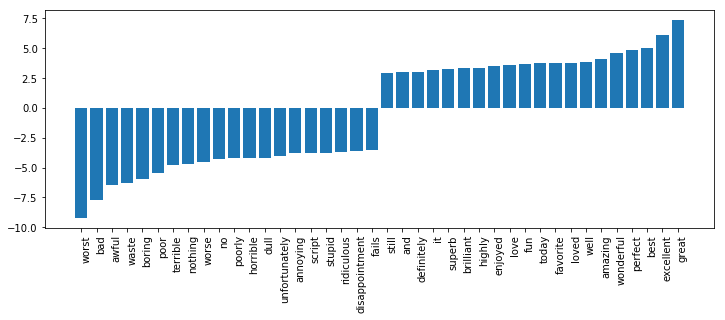

In [76]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), np.r_[fn[indexer[:20]], fn[indexer[-20:]]], rotation=90, ha='left')
print('')